# **Problem Statement**
**[Problem URL]**: (https://www.kaggle.com/datasets/shwetabh123/mall-customers)
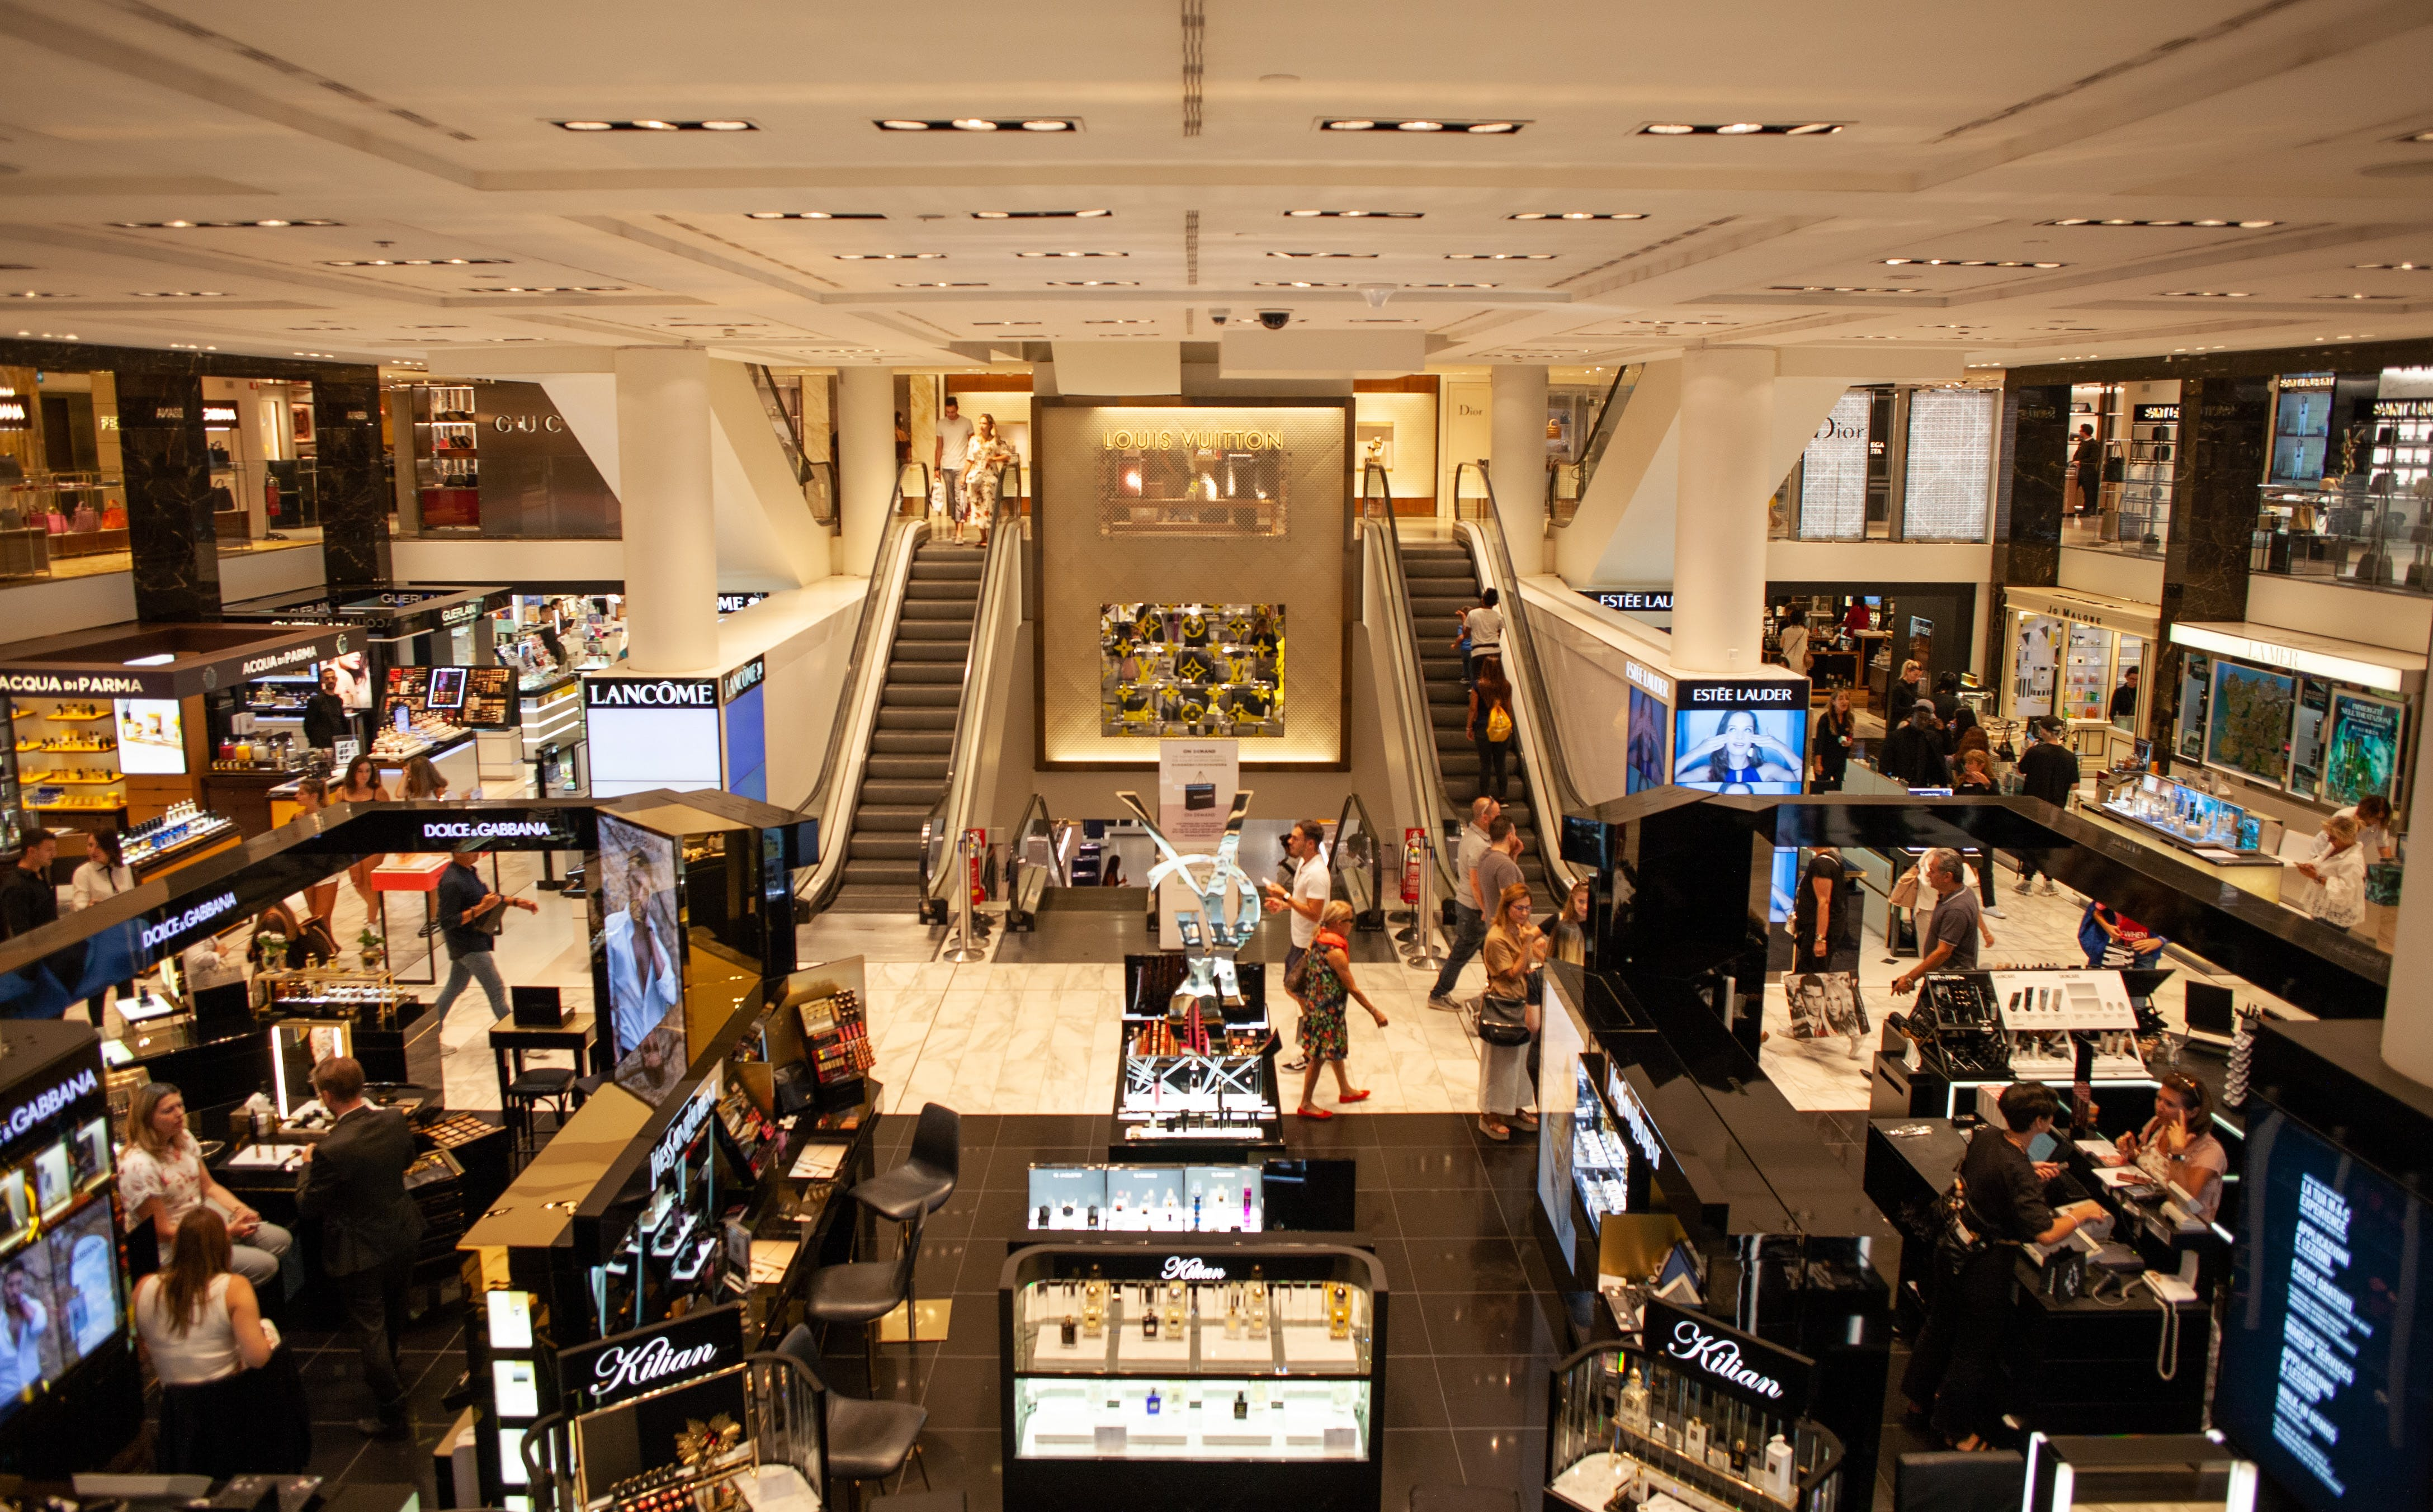


We have a dataset of Mall Customers, which is the data of customers who visit the mall and spend there.
The data includes the following features:
1. Customer ID
2.  Genre
3. Age
4. Annual Income (k$)
5. Spending Score(1-100) (based on customer behaviour and spending nature)
The given features gives the overview of calculated value of how much a customer has spent in the mall, the more the value, the more he/she has spent.

From this dataset, we need to calculate some patterns for unsupervised learning method.

## **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## **Loading the dataset**

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
print("The shape of the data is :",data.shape)
data.head()

The shape of the data is : (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### **Observation**
The data has 200 rows and 5 columns.

### **Data Exploration**

*   Checking null values.
*   Data information

In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

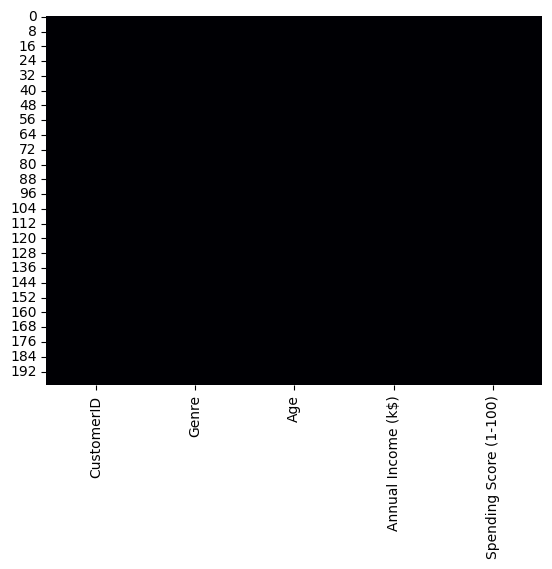

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

**No null values** present in the data.

#### **Distribution of Features** :

**Annual Income Distribution**:

<ipython-input-8-872ced25ac61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


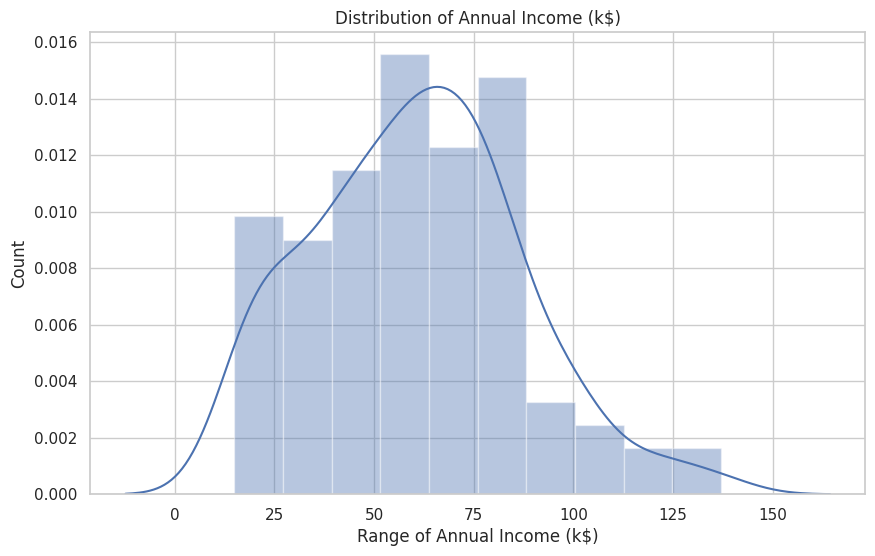

In [ ]:

#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.savefig("Distribution_of_Annual_Income")

**Age Distribution**:

<ipython-input-9-b8fe5688ac0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


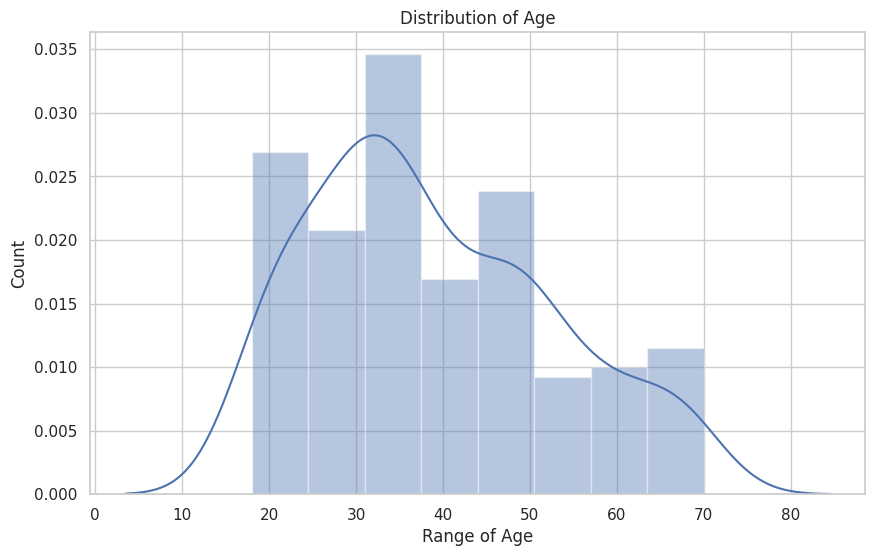

In [ ]:

#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.savefig("Distribution_of_Age")


**Spending Score Distribution:**

<ipython-input-10-1d0b8761a030>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


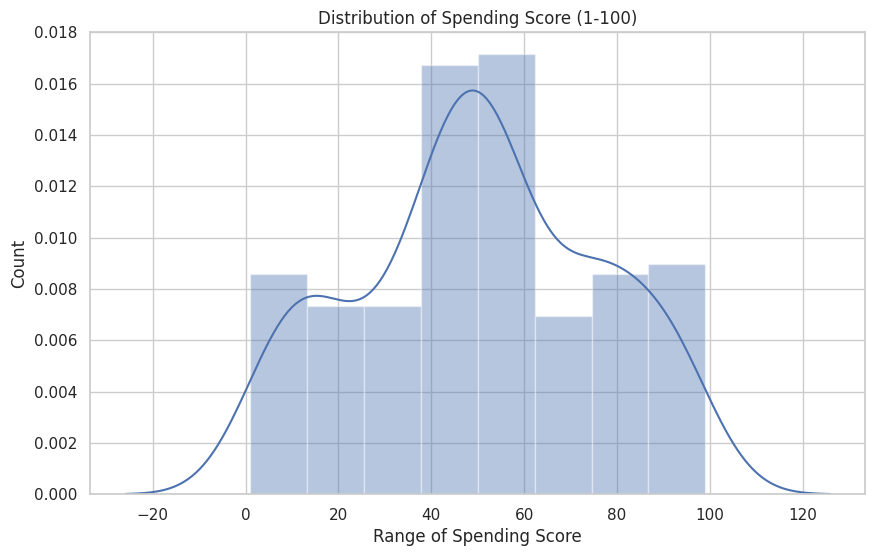

In [ ]:

#Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')
plt.savefig("Distribution_of_Spending_Score")


**Gender Analysis:**

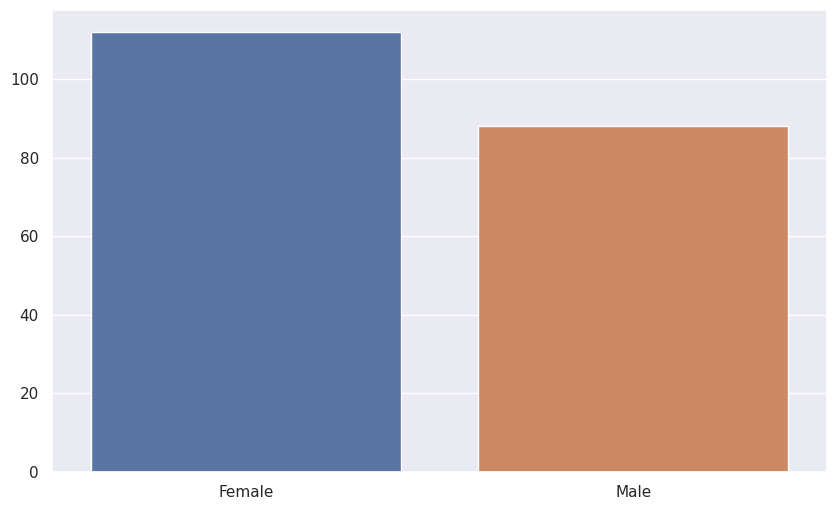

<Figure size 640x480 with 0 Axes>

In [ ]:
genre = data.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=genre.index, y=genre.values)
plt.savefig('Gender_Analysis', dpi=1000)
plt.show()
plt.draw()

In [ ]:
data.describe(include = "all")

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
x = data.iloc[:, [3, 4]].values

### **Finding the optimal number of clusters using the elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

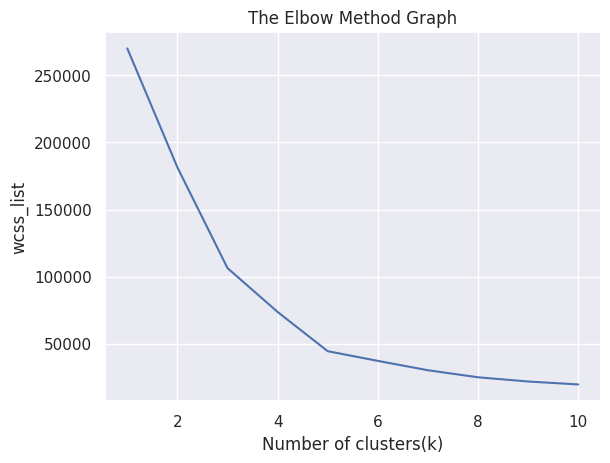

<Figure size 640x480 with 0 Axes>

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.savefig('Elbow Method Output', dpi=1000)
plt.show()
plt.draw()


From the above plot, we can see the elbow point is at 5. So the **number of clusters here will be 5**.

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **Visulaizing the Clusters**

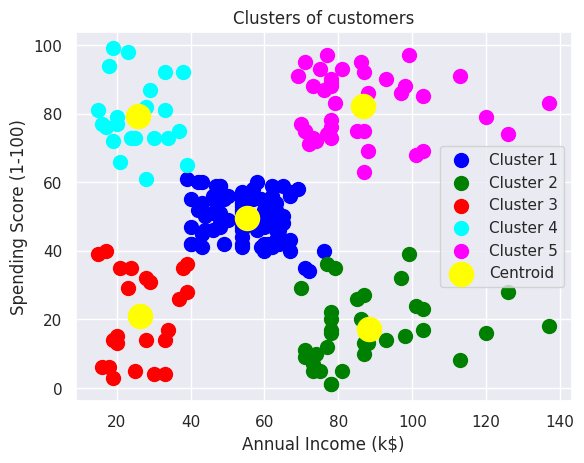

<Figure size 640x480 with 0 Axes>

In [ ]:
#visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('Visualization of Clusters', dpi=1000)
plt.show()
plt.draw()

## **Observations:**



* **Cluster1** shows the customers with average salary and average spending.

* **Cluster2** shows the customer has a high income but low spending, so they can be categorized as careful.

* **Cluster3** shows the low income and also low spending so they can be categorized as sensible.

* **Cluster4** shows the customers with low income with very high spending so they can be categorized as careless.

* **Cluster5** shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.